In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from pydtmc import MarkovChain, plot_graph, plot_walk, plot_eigenvalues

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

from labels import get_labels_df, get_cls2label

In [2]:
cls2label = get_cls2label()


label_df = get_labels_df('data/SHL-2021-Train/Label.txt')
label_df.head()

In [4]:
mc_label_df = label_df.copy()
mc_label_df['next_label'] = mc_label_df.label.shift(fill_value=1)

### Build transition matrix

In [55]:
p = np.zeros((8, 8), dtype=np.float64)

In [56]:
for idx, group in mc_label_df.groupby(['label', 'next_label']):
    group_size = len(group)
    p[idx[0]-1, idx[1]-1] = group_size
for i in range(len(p)):
    p[i, :] = p[i, :] / p[i, :].sum()

In [58]:
mc = MarkovChain(p, states=list(cls2label.values()))

In [59]:
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           8
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        NO
 REVERSIBLE:     NO
 SYMMETRIC:      NO



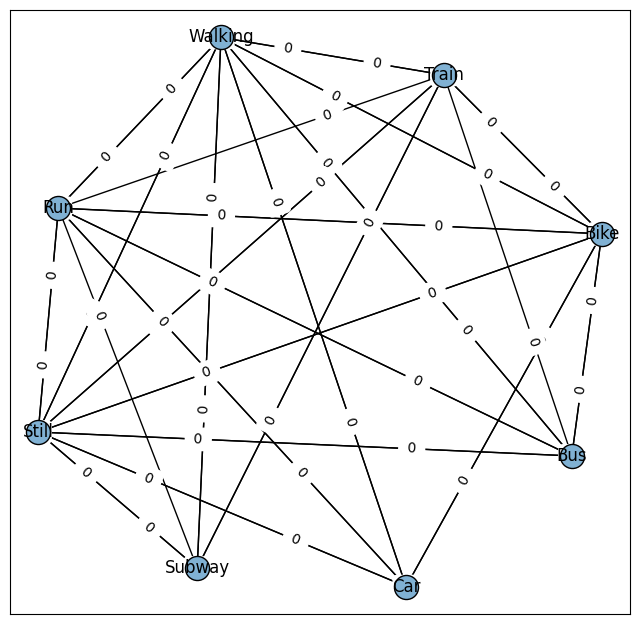

In [62]:
plot_graph(mc)

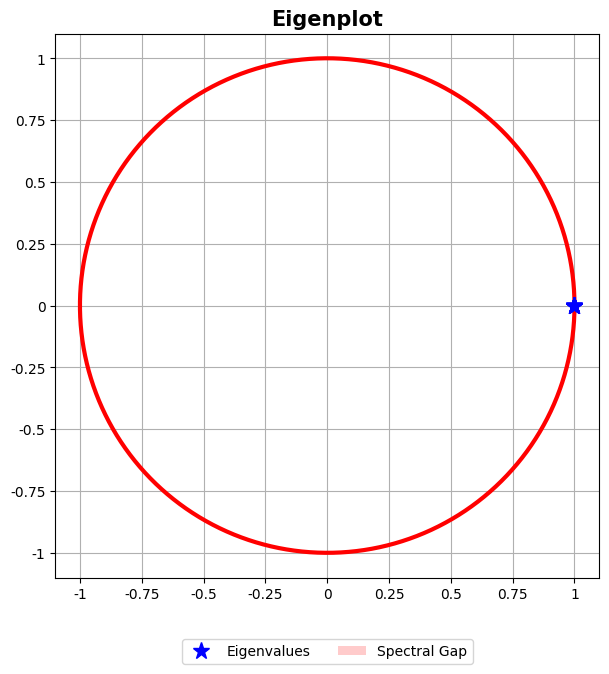

In [63]:
plot_eigenvalues(mc)

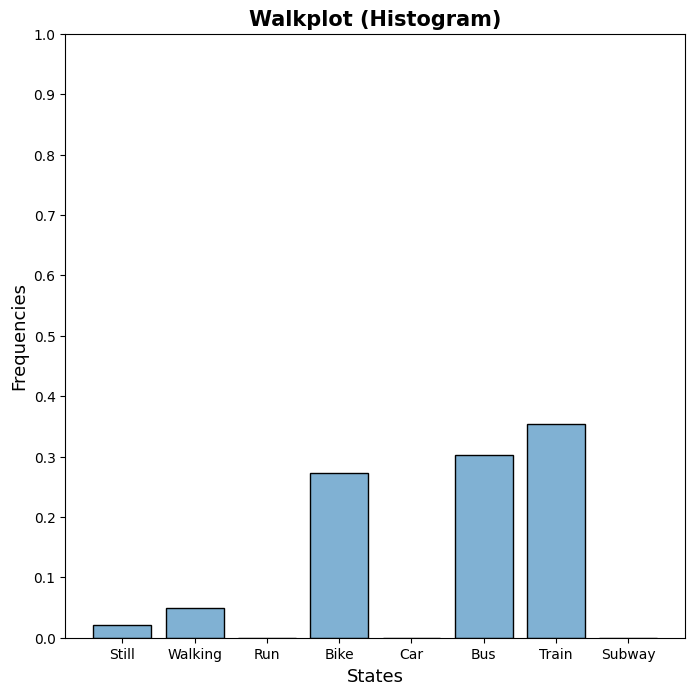

In [64]:
plot_walk(mc, 10000, initial_state='Bus', plot_type='histogram')

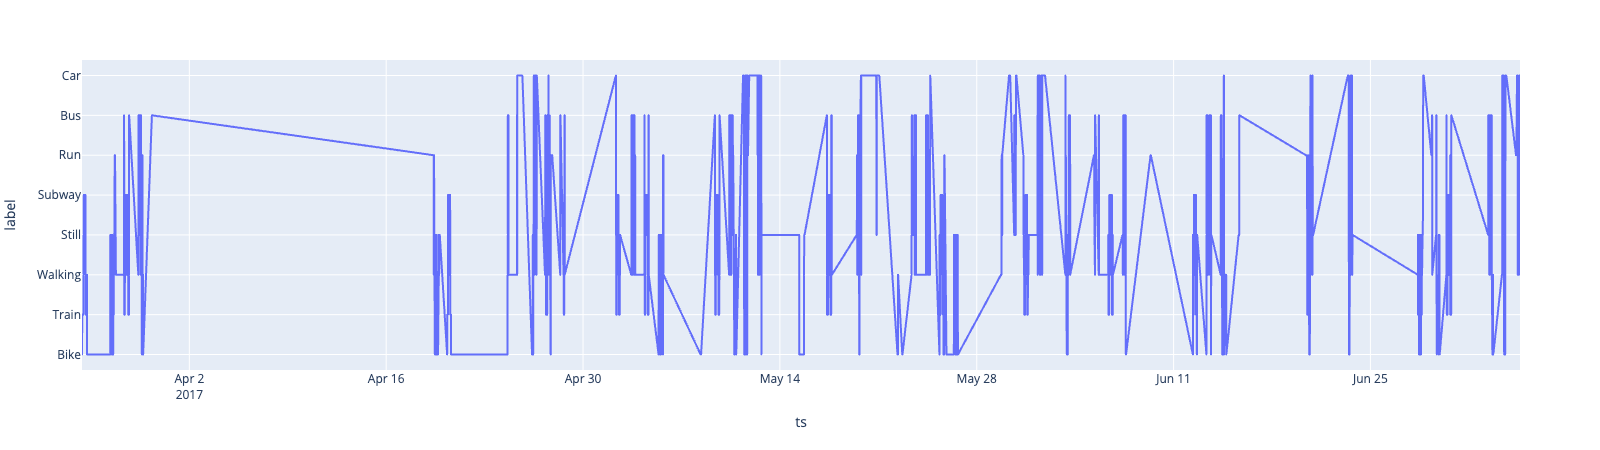

In [66]:
sub_label_df = label_df.iloc[::100, :].reset_index(drop=True)
sub_label_df.label = sub_label_df.label.map(cls2label)
fig = px.line(sub_label_df, x='ts', y='label')
fig.show()

In [73]:
pred_labels_df = label_df.copy()
pred_labels_df['pred_label'] = mc.walk(len(label_df))
pred_labels_df['pred_label'] = pred_labels_df['pred_label'].map({v: k for k, v in cls2label.items()})

In [77]:
f1_score(pred_labels_df.label, pred_labels_df.pred_label, average='macro')

0.11786658572938846

In [80]:
pred_labels_df.label.value_counts()

5    158695
7    156260
6    141643
2    122766
1    122301
8    119183
4    117403
3     42276
Name: label, dtype: int64

In [81]:
pred_labels_df.pred_label.value_counts()

7    206988
8    139355
5    136980
6    127656
2    119735
1    111156
4    109162
3     29495
Name: pred_label, dtype: int64